# 2차원 데이터 시각화

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

2차원 데이터를 시각화하는 다양한 방식을 소개한다.

## 서브플롯 관리

50명 학생의 영어와 수학 점수를 포함하는 2차원 데이터를 이용하여
두 종류의 점수를 활용한 산점도를 다음과 같이 간단하게 그릴 수 있다.
먼저 데이터를 불러온다.

In [7]:
# 데이터 불러오기
df = pd.read_csv(data_url+'ch02_scores_em.csv',
                 index_col='student number')

# 영어 점수와 수학 점수 구분
eng_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

동일한 산점도를 그리는 코드 두 개를 소개한다.
코드에 사용된 각각의 명령문의 역할은 주석으로 설명된다.

**그래프 코드 1**

아래 코드는 생성되는 모든 그래프의 크기를 미리 설정한다.

In [8]:
plt.rc('figure', figsize=(6, 5))

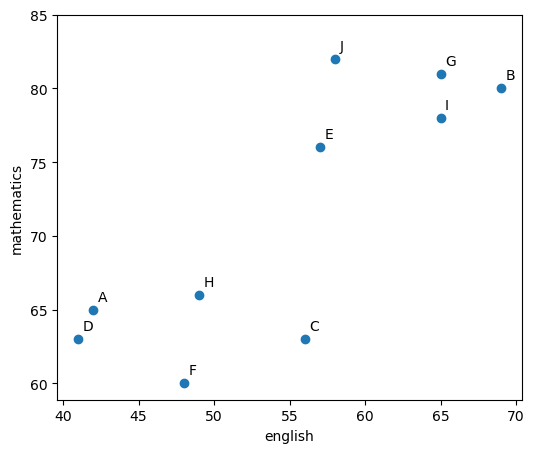

In [9]:
# 산점도 그리기
plt.scatter(eng_scores[:10], math_scores[:10])

# 축 이름 지정
plt.xlabel('english')
plt.ylabel('mathematics')

# 10명 학생 데이터 각각에 이름 추가
names = list('ABCDEFGHIJ')
for i, name in enumerate(names):
    plt.annotate(name, (eng_scores[i]+0.3, math_scores[i]+0.6))

# 눈금 범위 지정
plt.xticks(range(40, 75, 5))
plt.yticks(range(60, 90, 5))

# 준비된 모든 그래프 한꺼번에 보여주기
plt.show()

**그래프 코드 2**

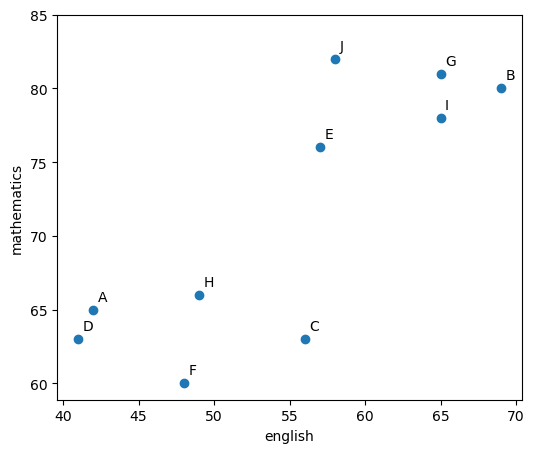

In [10]:
# Figure 객체 지정
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1)

# 산점도 그리기
ax.scatter(eng_scores[:10], math_scores[:10])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

# 10명 학생 데이터 각각에 이름 추가
names = list('ABCDEFGHIJ')
for i, name in enumerate(names):
    ax.annotate(name, (eng_scores[i]+0.3, math_scores[i]+0.6))

# 눈금 범위 지정
ax.set_xticks(range(40, 75, 5))
ax.set_yticks(range(60, 90, 5))

# 준비된 모든 그래프 한꺼번에 보여주기
plt.show()

두 그래프 코드의 차이점은 `Figure` 객체와 서브플롯의 활용에 있다.

**`Figure` 객체**

`Figure` 객체는 다음과 생성하며 그림 액작의 기능을 수행한다.

```python
fig = plt.figure(figsize=(6,5))
```

위 코드에서 `figsize=(6,5)`는 생성되는 그래프의 크기를 지정한다.
이렇게 하면 앞서 아래 방식으로 지정된 그래프의 크기와 다른 그래프를 필요할 때마다 지정할 수 있다.

```python
plt.rc('figure', figsize=(6, 5))
```

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/figures.png?raw=true" style="width:500px"></div></p>

<p style='text-align:center;'>그림 출처: <a href='https://velog.io/@regista/Matplotlib에서-Figure와-Axes-이해하기-Basic'>Matplotlib에서 Figure와 Axes 이해하기</a></p>

**서브플롯 추가**

서브플롯<font size='2'>subplot</font>은 그래프를 그릴 때 필요한 도화지에 해당한다.
아래 코드는 준비된 `Figure` 객체에 하나의 서브플롯을 추가한다.

```python
ax = fig.add_subplot(1, 1, 1)
```

위 코드는 다음과 같이 액자에 한 장의 도화지를 준비한 것과 동일하다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/figures_subplots.png?raw=true" style="width:600px"></div></p>

<p style='text-align:center;'>그림 출처: <a href='https://velog.io/@regista/Matplotlib에서-Figure와-Axes-이해하기-Basic'>Matplotlib에서 Figure와 Axes 이해하기</a></p>

반면에 아래 코드는 두 개의 서브플롯을 추가한다.

```python
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
```

위 코드는 액자에 두 장의 도화지를 좌우로 배치시키는 효과를 낸다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/figures_subplots121.png?raw=true" style="width:600px"></div></p>

<p style='text-align:center;'>그림 출처: <a href='https://velog.io/@regista/Matplotlib에서-Figure와-Axes-이해하기-Basic'>Matplotlib에서 Figure와 Axes 이해하기</a></p>

**`add_subplot()` 메서드의 인자**

`add_subplot()` 함수는 서브플롯을 행렬 모양으로 배치시킬 때 필요한 세 개의 정보를 인자로 받는다.

- 첫째와 둘째 인자: 도화지 배치를 지정하는 행렬의 크기
- 셋째 인자: 생성되는 서브플롯의 인덱스. 1부터 시작.

**`Axes` 객체**

`ax1`과 `ax2` 두 변수는 (1, 2) 모양으로 배치된 두 개의 서브플롯 각각의 위치 정보를 가리키는 `Axes` 객체다.

- `ax1`: (1, 2) 모양으로 배치된 두 개의 서브플롯 중에서 첫째, 즉 왼편에 위치한 서브플롯의 위치 정보
- `ax2`: (1, 2) 모양으로 배치된 두 개의 서브플롯 중에서 둘째, 즉 오른편에 위치한 서브플롯의 위치 정보

**그래프 삽입**

특정 서브플롯에 그래프를 그리려면 해당 서브플롯의 위치 정보를 가리키는 
`ax1` 또는 `ax2`를 선택하여 `scatter()`와 같은 함수를 호출한다.
예를 아래 코드는 10명 학생의 산점도와 함께 50명 전체의 산점도를 좌우로 나란히 배치시킨다.

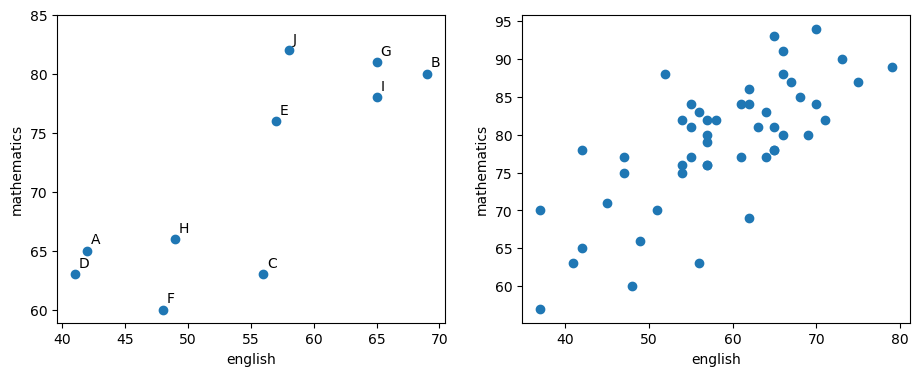

In [11]:
# Figure 객체 지정
fig = plt.figure(figsize=(11, 4))

# 왼쪽 도화지 지정
ax1 = fig.add_subplot(1, 2, 1)

# 오른쪽 도화지 지정
ax2 = fig.add_subplot(1, 2, 2)

# 왼쪽 도화지에 10명의 산점도 그리기
ax1.scatter(eng_scores[:10], math_scores[:10])
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')

# 10명 학생 데이터 각각에 이름 추가
names = list('ABCDEFGHIJ')
for i, name in enumerate(names):
    ax1.annotate(name, (eng_scores[i]+0.3, math_scores[i]+0.6))

# 눈금 범위 지정
ax1.set_xticks(range(40, 75, 5))
ax1.set_yticks(range(60, 90, 5))
    
# 오른쪽 도화지에 50명의 산점도 그리기
ax2.scatter(eng_scores, math_scores)

# x-축, y-축 이름 지정
ax2.set_xlabel('english')
ax2.set_ylabel('mathematics')

plt.show()

반면에 아래 코드는 두 개의 서브플롯을 위 아래로 배치시킨다.
`add_subplot()` 함수의 인자가 `(2, 1, 1)`와 `(2, 1, 2)`가 사용됨에 주의한다.

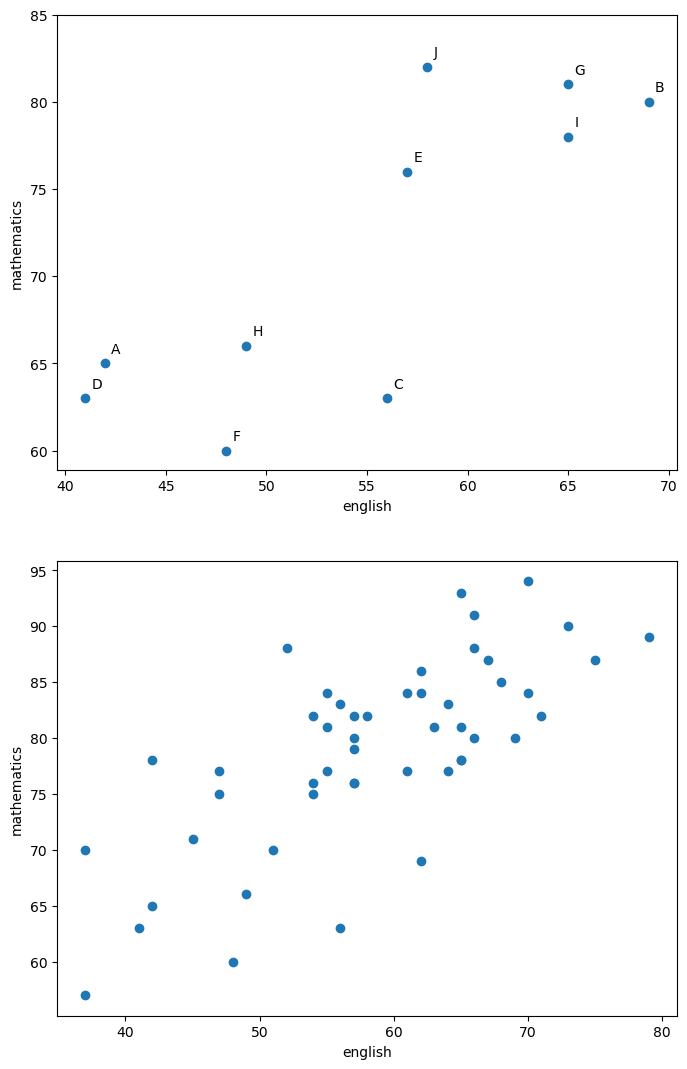

In [12]:
# Figure 객체 지정
fig = plt.figure(figsize=(8, 13))

# 위쪽 도화지 지정
ax1 = fig.add_subplot(2, 1, 1)
# 아래쪽 도화지 지정
ax2 = fig.add_subplot(2, 1, 2)


# 왼쪽 도화지에 10명의 산점도 그리기
ax1.scatter(eng_scores[:10], math_scores[:10])
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')

# 10명 학생 데이터 각각에 이름 추가
names = list('ABCDEFGHIJ')
for i, name in enumerate(names):
    ax1.annotate(name, (eng_scores[i]+0.3, math_scores[i]+0.6))

# 눈금 범위 지정
ax1.set_xticks(range(40, 75, 5))
ax1.set_yticks(range(60, 90, 5))
    
# 오른쪽 도화지에 50명의 산점도 그리기
ax2.scatter(eng_scores, math_scores)

# x-축, y-축 이름 지정
ax2.set_xlabel('english')
ax2.set_ylabel('mathematics')

plt.show()

## 선형 회귀

50명의 영어와 수학 점수를 이용한 산점도를 보면 두 점수 사이의 상관계수가 높아 보인다.
실제로 0.72 정도로 확인된다.

In [13]:
np.corrcoef(eng_scores, math_scores)

array([[1.      , 0.723741],
       [0.723741, 1.      ]])

산점도를 보면 영어 점수가 높아질 수록 수학 점수도 일반적으로 상승하는 경향이 있다.
그 경향이 0.72 정도라는 의미인데 이를 보다 직관적으로 표현하기 위해
두 데이터의 상관관계를 시작적으로 보여주는 직선을 그릴 수 있다.

**회귀 직선**

50명의 점수를 가장 잘 대변하는 직선의 기울기와 절편을 구하기 위해
여기서는 `np.polyfit()` 함수를 이용한다.

In [14]:
poly_fit = np.polyfit(eng_scores, math_scores, 1)

In [15]:
poly_fit

array([ 0.621423, 42.601324])

`poly_fit` 변수가 가리키는 어레이는 두 점수의 상관관계를 **가장** 잘 드러내는 직선의 기울기와 절편을 포함다.
이 정보를 이용하여 산포도와 직선을 함께 그리면 찾아진 직선의 의미를 정확히 파악된다.

직선을 그리기 위해 필요한 x-축, y-축 좌표를 지정한다.
아래 코드에서 `np.poly1d()` 함수는 기울기와 절편을 이용한 1차 함수를 선언한다.

In [16]:
# x-좌표 생성
xs = np.linspace(eng_scores.min(), eng_scores.max())

# xs에 대응하는 y-좌표 생성
poly_eng_math = np.poly1d(poly_fit)
ys = poly_eng_math(xs)

아래 코드는 산점도와 회귀 직선을 하나의 그래프에 동시에 그린다.

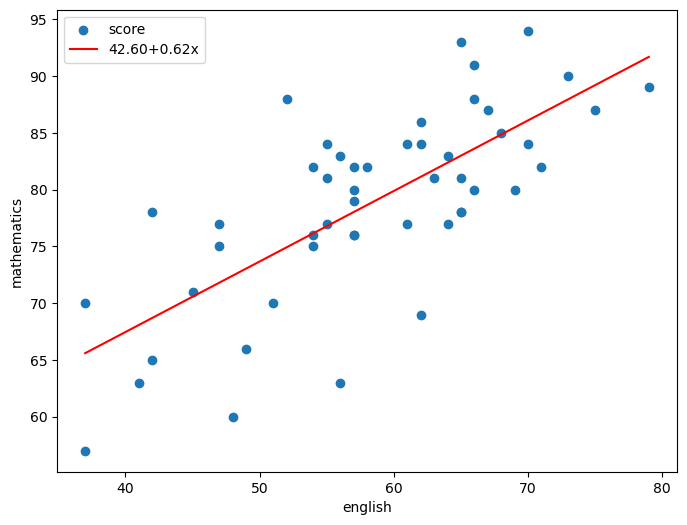

In [17]:
# Figure 객체 지정
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

# 산점도 그리기
ax.scatter(eng_scores, math_scores, label='score')

# 회귀 직선 그리기

# 직선 그리기
ax.plot(xs, ys, color='red', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

ax.set_xlabel('english')
ax.set_ylabel('mathematics')

# 범례의 표시
ax.legend(loc='upper left')

plt.show()

**회귀 예측**

44점과 59점은 50명의 영어 점수에 포함되지 않는다.

In [18]:
eng_x = 44
eng_x in eng_scores

False

In [19]:
eng_y = 59
eng_y in eng_scores

False

이때 두 학생의 수학 점수는 어느 정도일지 예측할 때 앞서 찾은 회귀 직선 `poly_eng_math`를 이용할 수 있다.

- 영어 점수가 44점일 때 수학 점수 예측값

In [20]:
math_x = poly_eng_math(eng_x)
math_x

69.943937

- 영어 점수가 59점일 때 수학 점수 예측값

In [21]:
math_y = poly_eng_math(eng_y)
math_y

79.265282

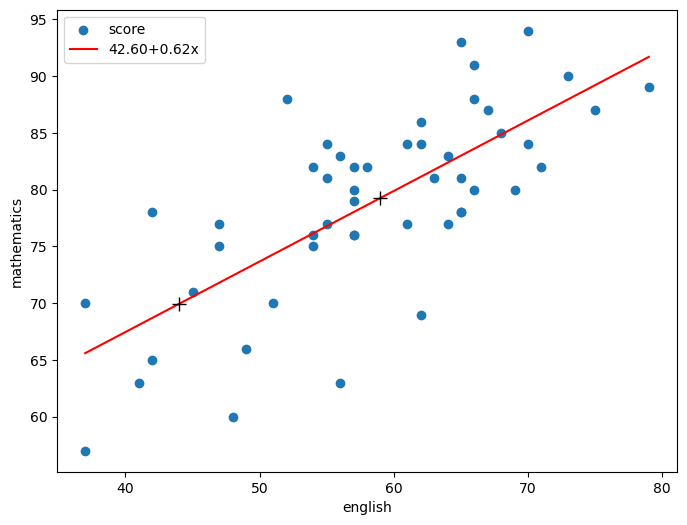

In [22]:
# Figure 객체 지정
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)

# 산점도 그리기
ax.scatter(eng_scores, math_scores, label='score')

# 회귀 직선 그리기

# 직선 그리기
ax.plot(xs, ys, color='red', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

ax.set_xlabel('english')
ax.set_ylabel('mathematics')

# 영어 59점과 90점일 때의 예측값
ax.plot([eng_x, eng_y], [math_x, math_y], '+k', ms=10)

# 범례의 표시
ax.legend(loc='upper left')

plt.show()

**평균 제곱근 오차**

앞서 찾은 직선 회귀가 50명의 영어 점수와 수학 점수 사이의 선형 상관관계를 **가장 잘 보여준다**고 하였다.
그런데 어떤 기준으로 '가장 잘 보여준다'라고 했을까? 

평균 제곱근 오차<font size='2'>root mean squared error</font>가 기준으로 사용되며 아래 식으로 정의된다.

$$
RMSE = \sqrt{\frac 1 n \, \sum_{i=1}^{n} (y_i - \hat{y_i})^2}
$$

단, 다음이 성립한다. 

- $y_i$: 실제 값
- $\hat{y_i}$: 예측값

아래 그래프는 7개의 실제 데이터와 예측값에 대해 오차의 제곱을 시각적으로 보여준다.

<p><div align="center"><img src="https://github.com/codingalzi/DataSci/blob/master/jupyter-book/images/rmse.png?raw=true" style="width:500px"></div></p>

<p style='text-align:center;'>그림 출처: <a href='https://jmlb.github.io/flashcards/2018/07/01/mae_vs_rmse/'>Root Mean Squared Error Versus Mean Absolute Error</a></p>

`np.polyfit()` 함수는 평균 제곱근 오차를 기준으로 최적의 직선 정보를 찾아준다.
정확한 근거는 여기서는 소개하지 않는다.

## 2차워 히스토그램

영어 점수와 수학 점수를 대상으로 동시에 구간별 빈도를 
격자무늬로 구분된 영역에 값의 크기를 색으로 구분하는 
**히트맵**<font size='2'>heat map</font> 형식으로 표현한다.

아래 코드는 영어 점수와 수학 점수 각각을 5점 간격으로 쪼갠 후 각 영역에 포함된 학생수를 
히트맵으로 표현한다.

- 영어 점수 구간: 35점부터 80점, 총 45점 구간을 9개 구간으로 나눔.
- 수학 점수 구간: 55점부터 95점, 총 40점 구간을 8개 구간으로 나눔.

`plt.hist2d()` 함수의 반환값: 길이가 4인 튜플

- 첫째 항목: (9,8) 모양의 빈도 어레이
- 둘째 항목: x-축 구간
- 셋째 항목: y-축 구간
- 넷째 항목: 히트맵 모양의 지도를 가리키는 객체

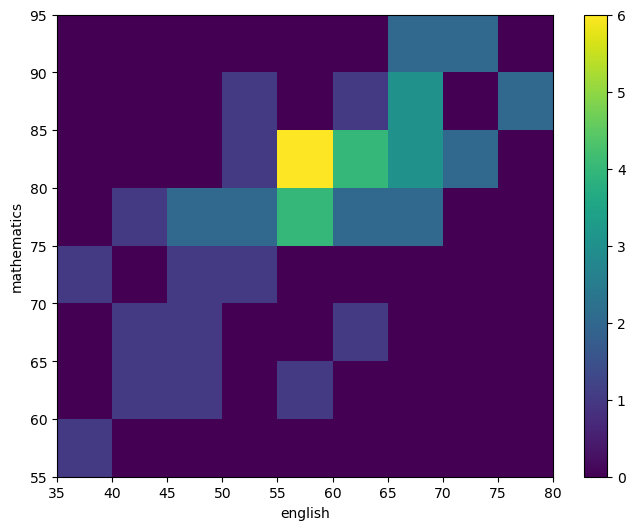

In [23]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

c = ax.hist2d(eng_scores,
              math_scores,
              bins=[9, 8], 
              range=[(35, 80), (55, 95)])

ax.set_xlabel('english')
ax.set_ylabel('mathematics')

ax.set_xticks(c[1]) # x-축 구간
ax.set_yticks(c[2]) # y-축 구간

# 컬러바: 히트맵 정보 활용
fig.colorbar(c[3], ax=ax)

plt.show()

**seaborn 라이브러리**

seaborn 라이브러리는 matplotlib 라이브러리를 확장하여 보다 다양한 기능을 제공한다.

In [24]:
import seaborn as sns

아래 코드는 동일한 히트맵을 다른 느낌으로 전달한다.

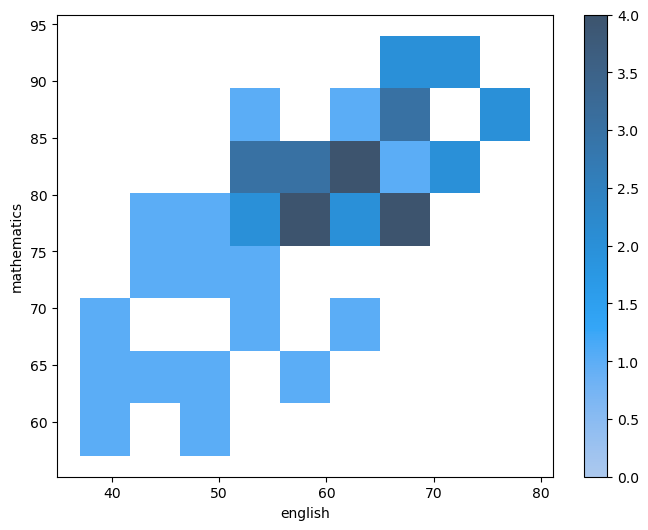

In [25]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

sns.histplot(df, x='english', y='mathematics', bins=(9,8), cbar=True, ax=ax)

plt.show()

## 예제: 앤스컴의 데이터 4중주

주어진 데이터의 특성을 지금까지 분산, 상관계수 등 수치 지표를 이용하여 파악하였다.
그런데 수치 지표가 동일하더라도 시각화를 진행하면 완전히 다른 데이터가 될 수 있다.
설명을 위해 앤스컴의 4중주(Anscombe's quartet)를 소개한다.

:::{admonition} 프랜시스 앤스컴
:class: note

프랜시스 앤스컴<font size='2'>Francis J. Anscombe</font>는 영국 출식 통계학자이며, 
1973년에 앤스컴의 4중주라고 불리는 4개의 데이터셋을 소개하였다.
:::

**데이터 불러오기**

먼저 앤스컴의 4중주 데이터는 다양한 방식으로 저장되어 많은 인터넷 저장소로부터 구할 수 있다.
여기서 사용하는 기본 저장소에서도 다운로드할 수 있으며 데이터프레임으로 불러온 결과는 다음과 같다.

In [26]:
anscombe_df = pd.read_csv(data_url+'anscombe.csv')
anscombe_df

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


`x1`부터 `x4`까지, 그리고 `y1`부터 `y4`까지의 데이터가 각각 
평균편차, 분산, 4분위수가 모두 동일함에 주목한다.

In [27]:
anscombe_df.describe()

,x1,x2,x3,x4,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
min,4.000000,4.000000,4.000000,8.000000,4.260000,3.100000,5.390000,5.250000
25%,6.500000,6.500000,6.500000,8.000000,6.315000,6.695000,6.250000,6.170000
50%,9.000000,9.000000,9.000000,8.000000,7.580000,8.140000,7.110000,7.040000
75%,11.500000,11.500000,11.500000,8.000000,8.570000,8.950000,7.980000,8.190000
max,14.000000,14.000000,14.000000,19.000000,10.840000,9.260000,12.740000,12.500000


**`(xi, yi)` 를 담은 네 개의 어레이**

(xi, yi)로 구성된 네 개의 데이터셋을 선언한다.
다양한 방식이 가능하지만 여기서는 가장 단순하네 네 개의 변수를 선언한다.

In [28]:
data1 = anscombe_df.iloc[:, [0, 4]]
data2 = anscombe_df.iloc[:, [1, 5]]
data3 = anscombe_df.iloc[:, [2, 6]]
data4 = anscombe_df.iloc[:, [3, 7]]

In [29]:
anscombe_data = [data1, data2, data3, data4]

**산점도와 선형 회귀**

네 데이터셋을 대상으로 산점도와 회귀 직선을 그린다.
(2, 2) 모양의 서브플롯을 이용하여 네 개의 그래프를 그린다.

- `plt.subplots()` 함수: `Figure` 객체와 `Axes` 객체를 동시에 지정함.
- 아래 코드에서 `axes`는 (2,2) 모양의 `Axes` 정보를 담는 어레를 가리킴.

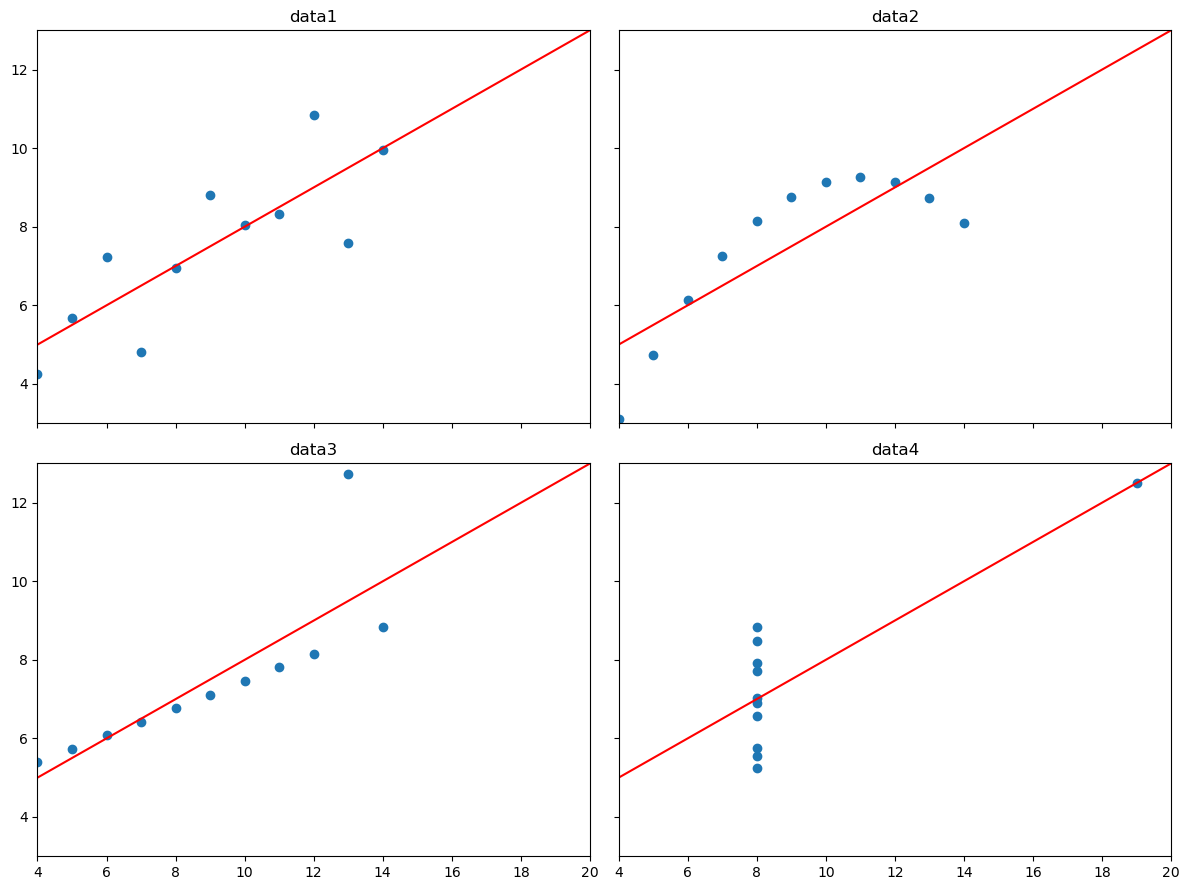

In [30]:
# Figure 객체와 Axes 지정
fig, axes = plt.subplots(nrows=2, 
                         ncols=2, 
                         figsize=(12, 9),
                         sharex=True, 
                         sharey=True)

xs = np.linspace(0, 30, 100)

for i, data in enumerate(anscombe_data):
    # 회귀 직선 데이터
    poly_fit = np.polyfit(data.iloc[:,0], data.iloc[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    
    # 서브플롯 지정
    ax = axes[i//2, i%2]
    
    ax.scatter(data.iloc[:,0], data.iloc[:,1])
    ax.plot(xs, ys, color='red')

    # x-축, y-축 범위 지정
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])

    # 타이틀
    ax.set_title(f'data{i+1}')

# 그래프 사이의 간격을 좁힘
plt.tight_layout()
plt.show()

**결론**

평균, 분산, 상관계수 등 모든 수치 지표가 동일하지만 네 개의 데이터는 완전히 다른 분포를 띠고 있다.
따라서 수치 지표 뿐만 아니라 시각화된 그래프도 함께 확인하는 일이 매우 중요하다.

## 연습문제

참고: [(연습) 2차원 데이터 시각화](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-twoD_visualization.ipynb)